<a href="https://colab.research.google.com/github/Minazor/GlobalAIHub_Bootcamp_Project/blob/main/GlobalAIHub_MedicalCostAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [ ]:
insurance = pd.read_csv("/content/insurance.csv")

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#encode the sex,smoker and region for find corr between the features
insurance['sex_encode'] = insurance['sex'].replace({'female': 1, 'male': 0})
insurance['smoker_encode'] = insurance['smoker'].replace({'yes': 1, 'no': 0})

In [ ]:
insurance['region'].unique()
labelencoder = LabelEncoder()
insurance['region_encode'] = labelencoder.fit_transform(insurance['region'])
insurance

,age,sex,bmi,children,smoker,region,charges,sex_encode,smoker_encode,region_encode
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,3
1,18,male,33.770,1,no,southeast,1725.55230,0,0,2
2,28,male,33.000,3,no,southeast,4449.46200,0,0,2
3,33,male,22.705,0,no,northwest,21984.47061,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,3


In [ ]:
insurance['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

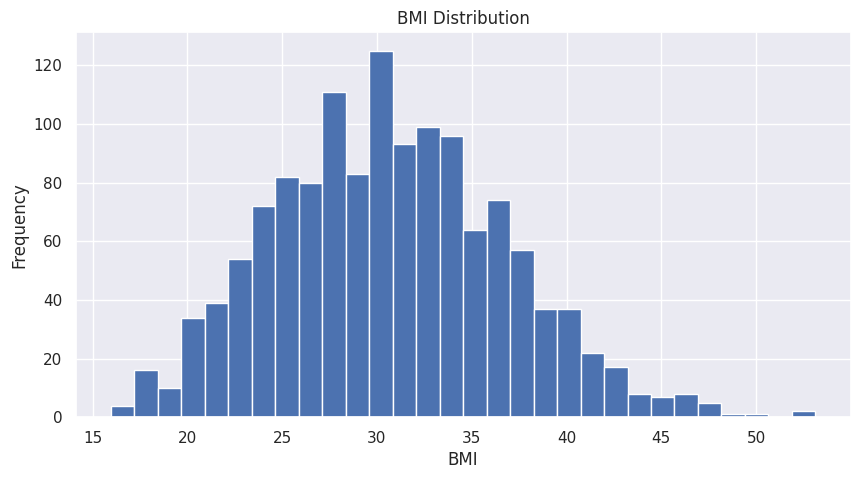

In [ ]:
insurance['bmi'].hist(bins= 30, figsize=(10, 5))
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [ ]:
insurance[["smoker_encode", "charges"]].corr()

,smoker_encode,charges
smoker_encode,1.000000,0.787251
charges,0.787251,1.000000


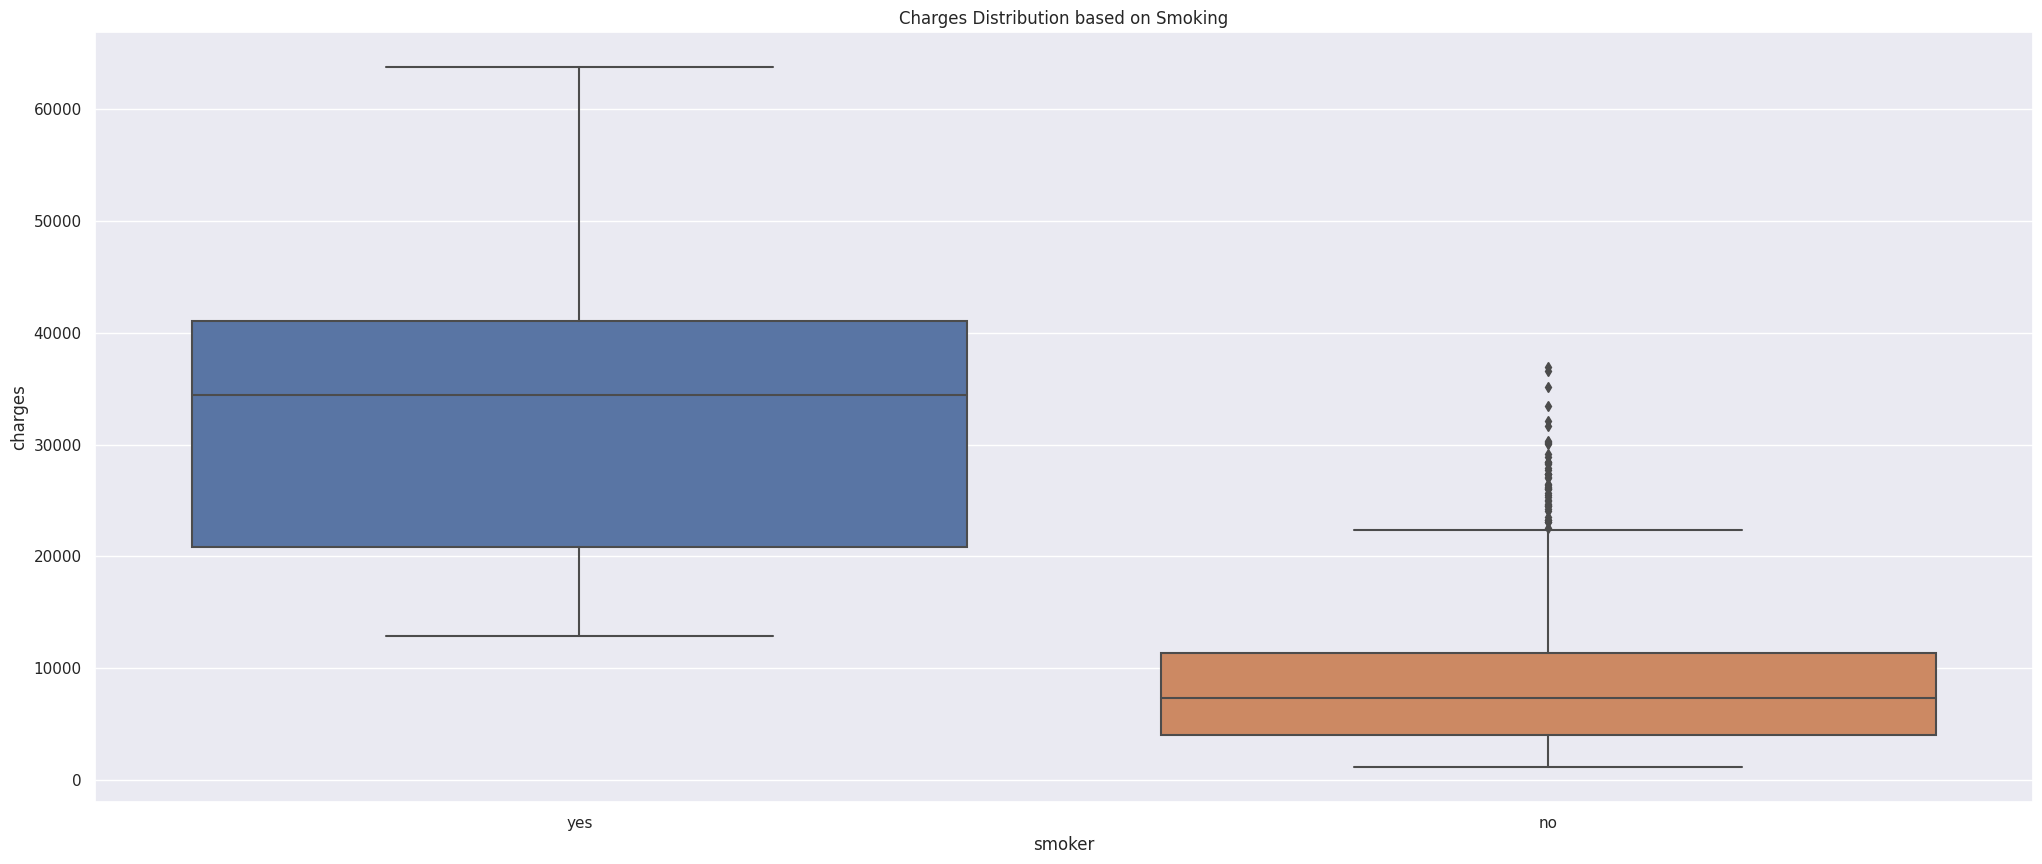

In [ ]:
sns.boxplot(x='smoker', y='charges', data=insurance)
plt.title('Charges Distribution based on Smoking')
plt.show()

In [ ]:
insurance[["smoker_encode", "region_encode"]].corr()

,smoker_encode,region_encode
smoker_encode,1.000000,-0.002181
region_encode,-0.002181,1.000000


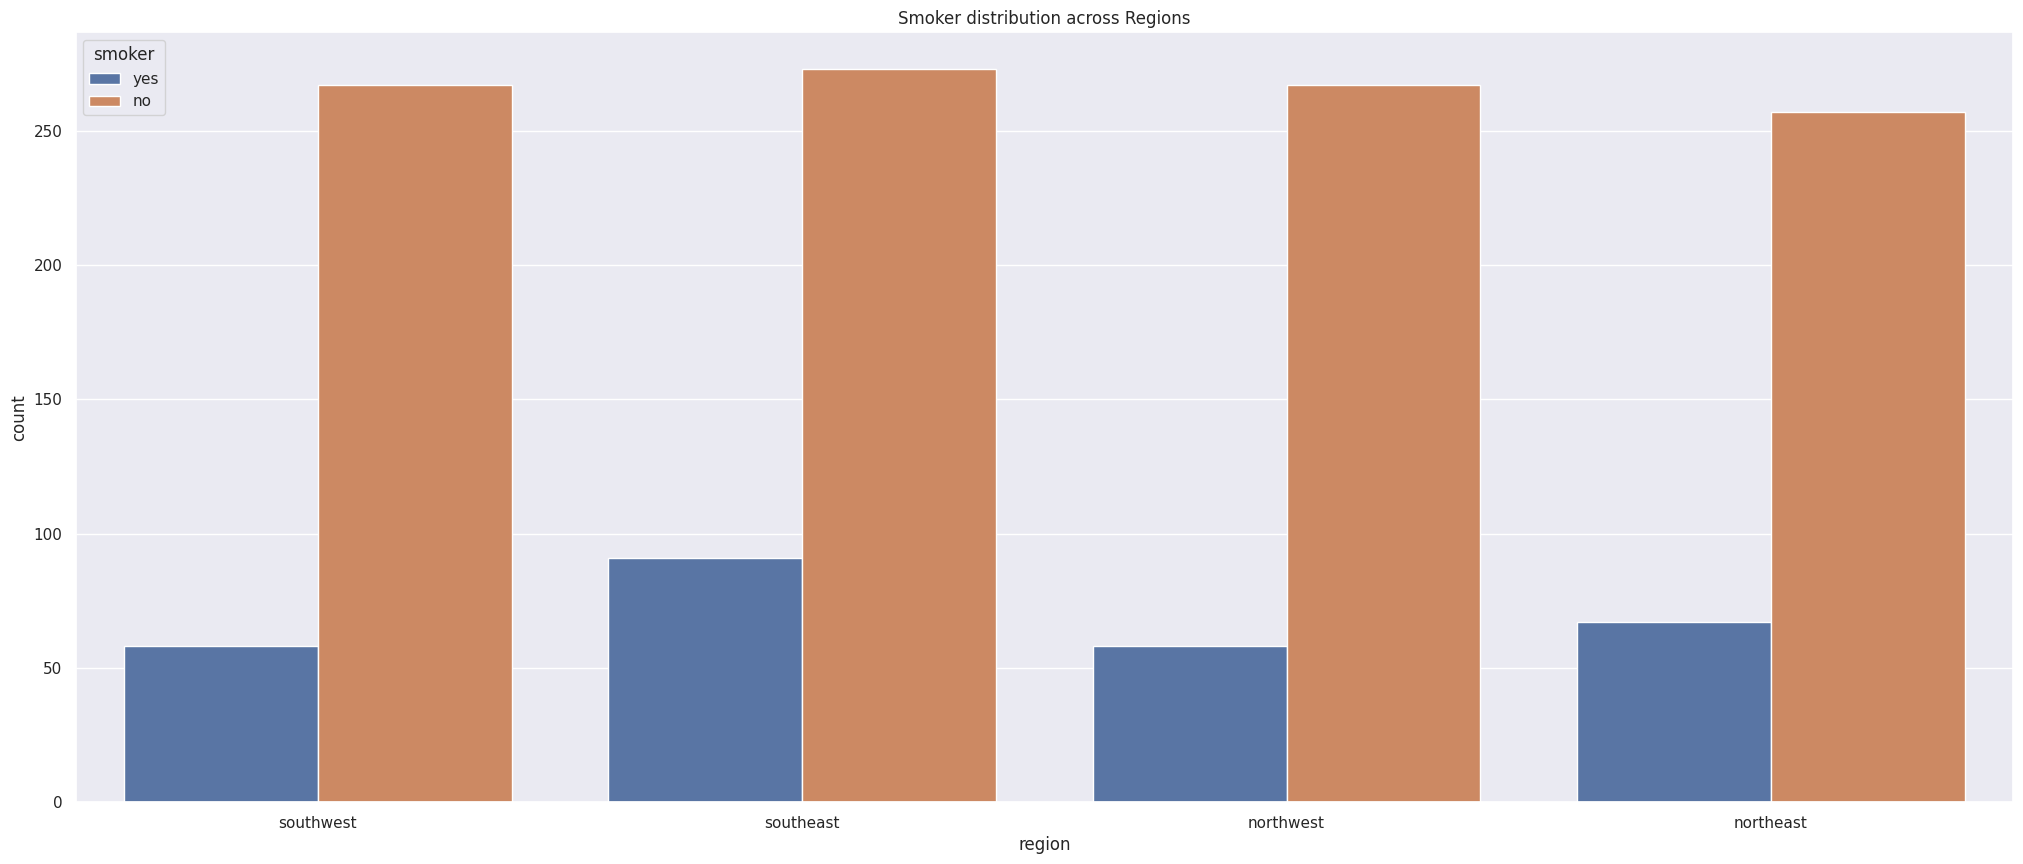

In [ ]:
sns.countplot(x='region', hue='smoker', data=insurance)
plt.title('Smoker distribution across Regions')
plt.show()

In [ ]:
insurance[["sex_encode", "bmi"]].corr()

,sex_encode,bmi
sex_encode,1.000000,-0.046371
bmi,-0.046371,1.000000


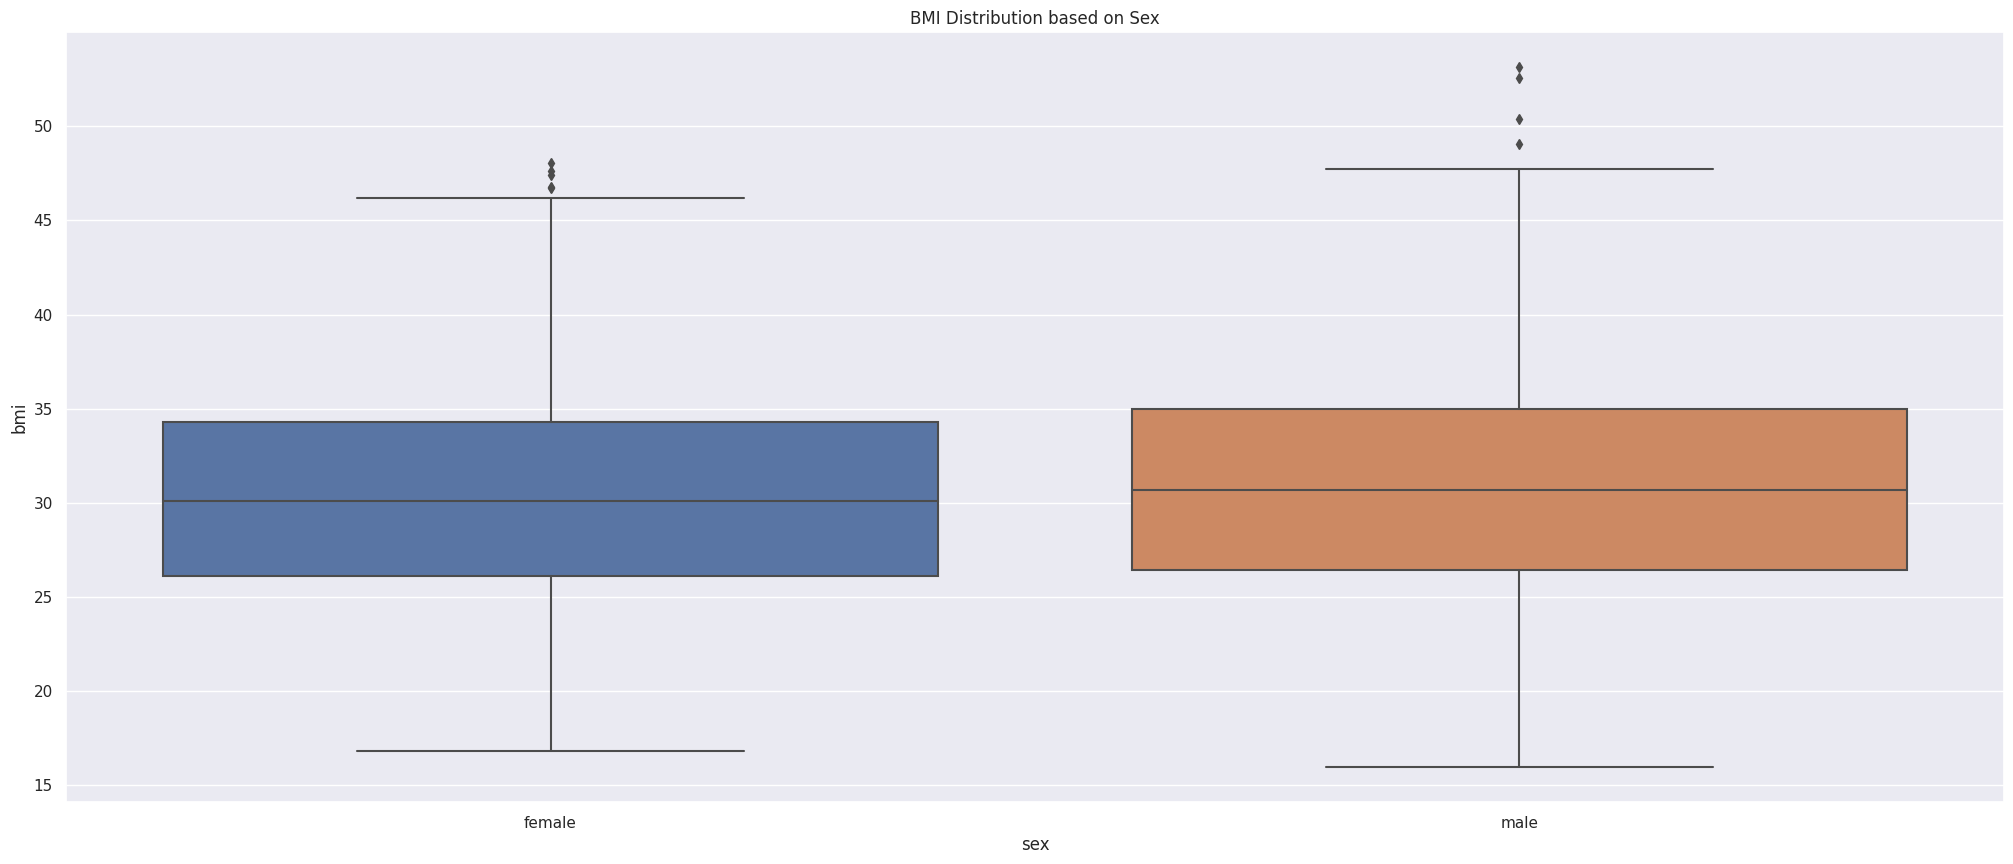

In [ ]:
sns.boxplot(x='sex', y='bmi', data=insurance)
plt.title('BMI Distribution based on Sex')
plt.show()

In [ ]:
insurance[["age", "bmi"]].corr()

,age,bmi
age,1.000000,0.109272
bmi,0.109272,1.000000


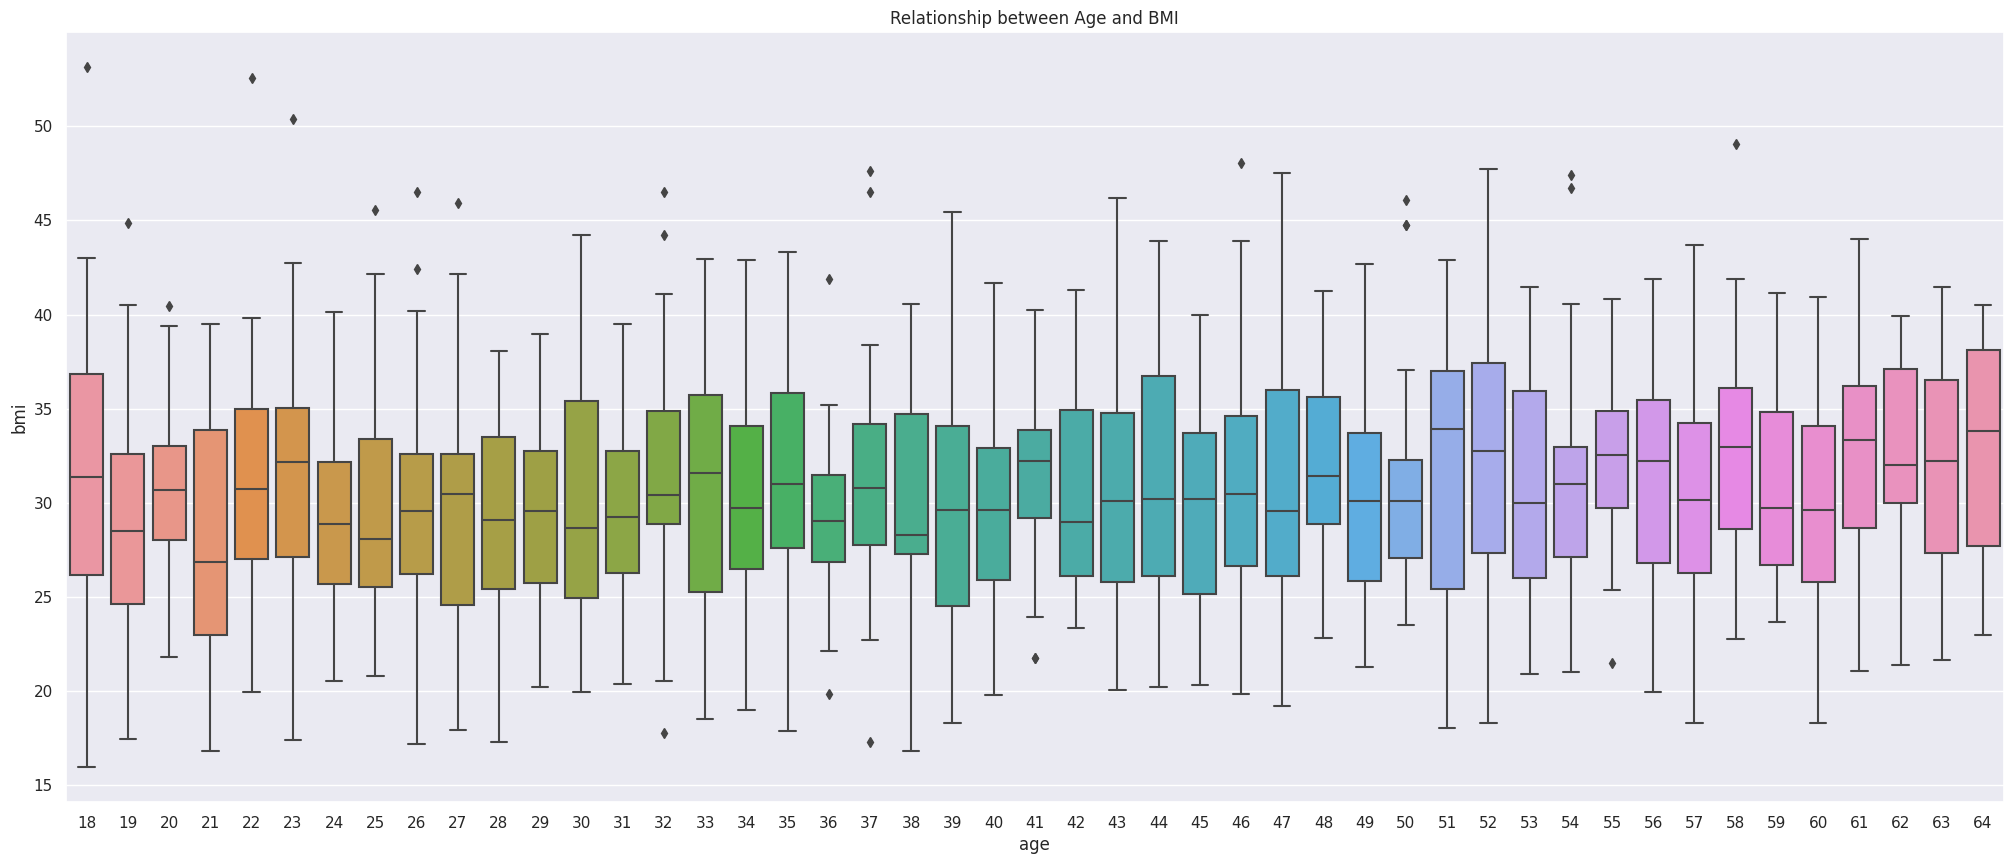

In [ ]:
sns.boxplot(x='age', y='bmi', data=insurance,)
sns.set(rc={'figure.figsize':(25,10)})
plt.title('Relationship between Age and BMI')
plt.show()

In [ ]:
insurance[["bmi", "children"]].corr()

,bmi,children
bmi,1.000000,0.012759
children,0.012759,1.000000


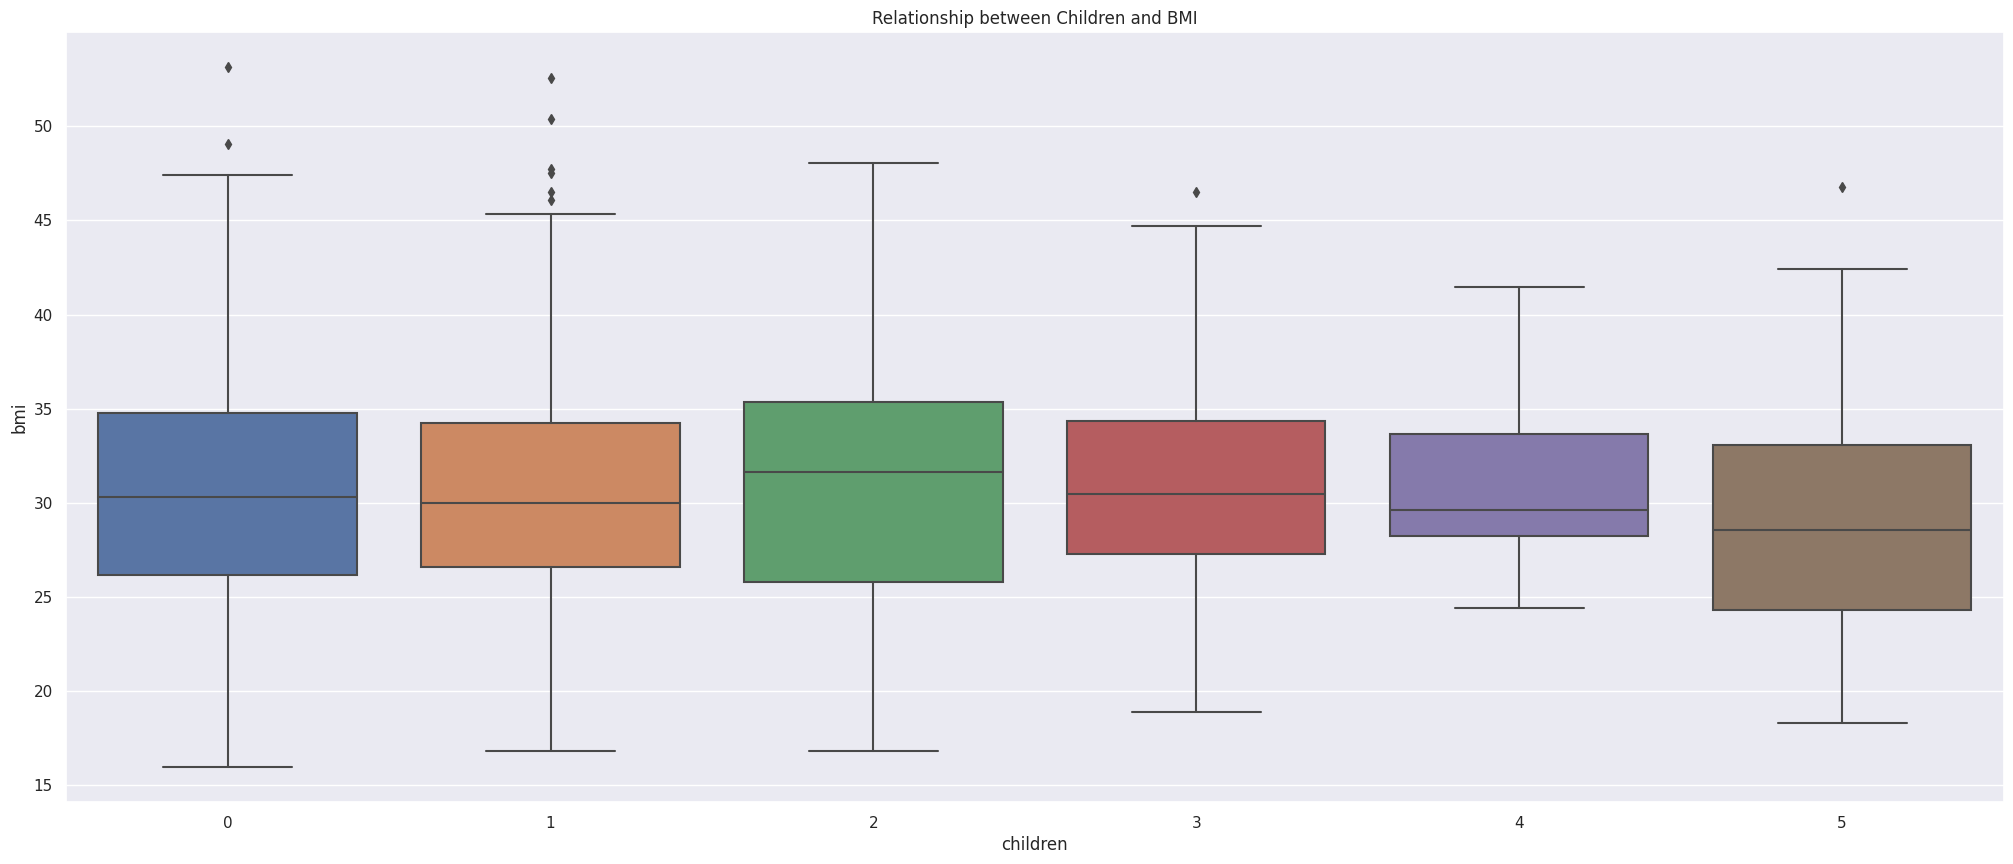

In [ ]:
sns.boxplot(x='children', y='bmi', data=insurance)
plt.title('Relationship between Children and BMI')
plt.show()

In [ ]:
insurance[["bmi", "charges"]].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


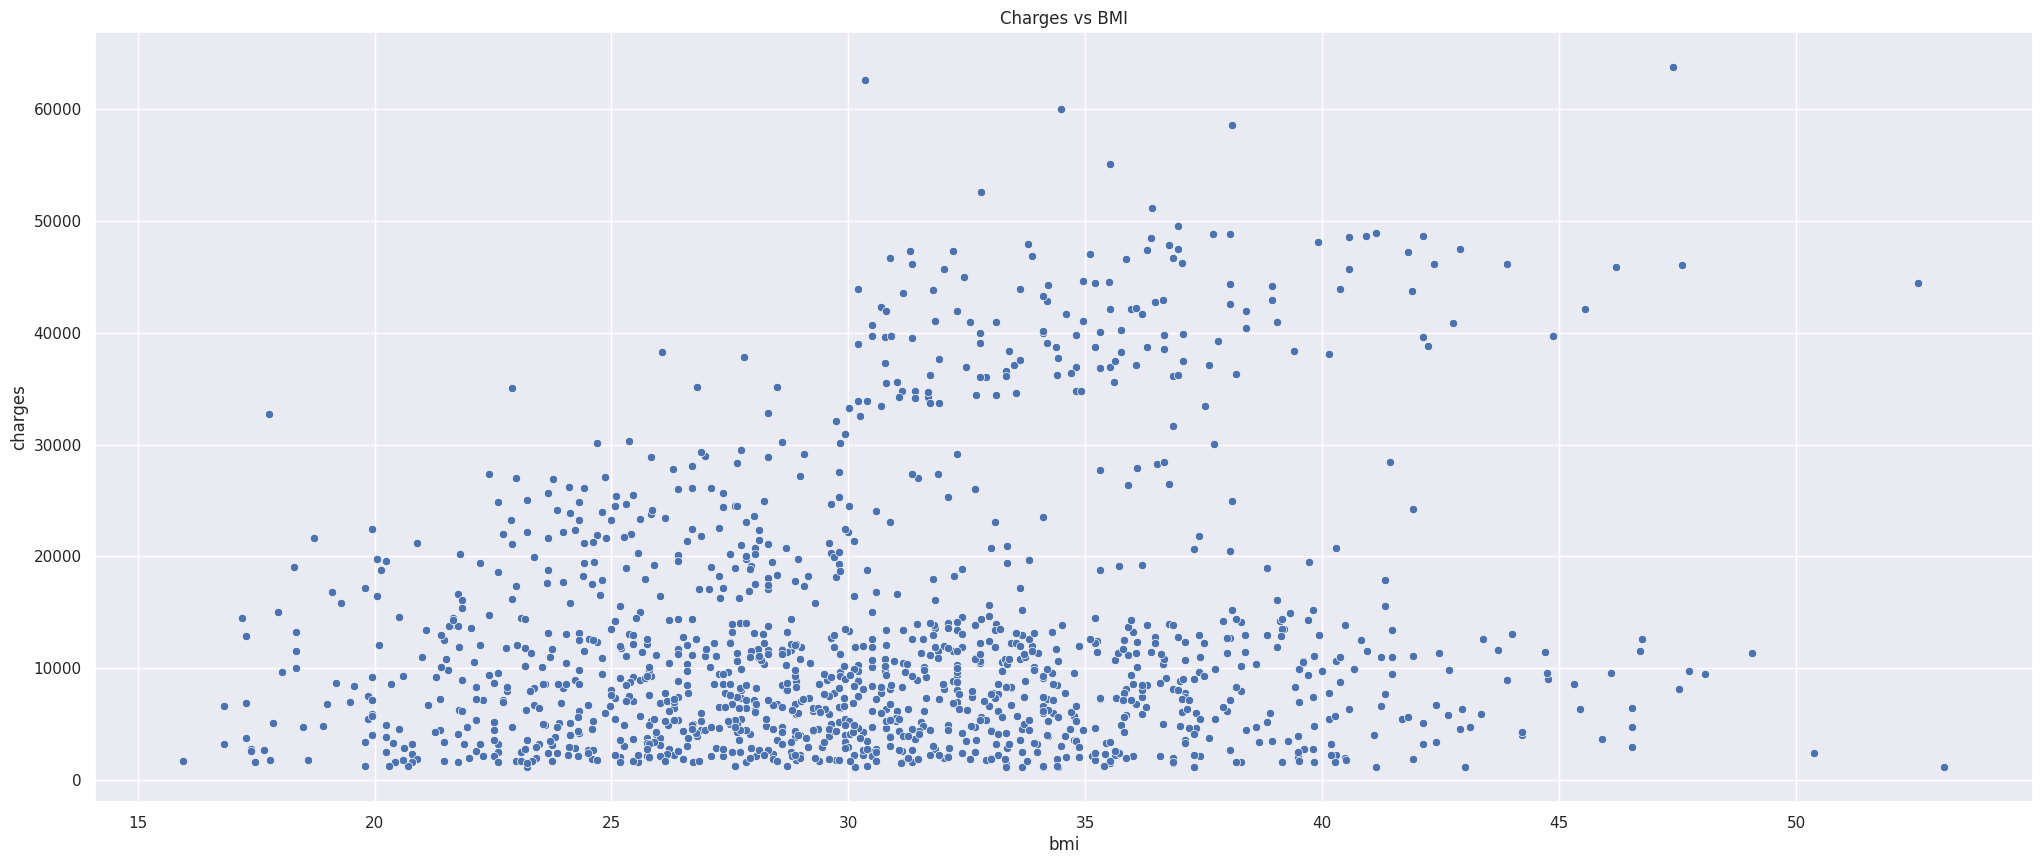

In [ ]:
sns.scatterplot(x='bmi', y='charges', data=insurance)
plt.title('Charges vs BMI')
plt.show()

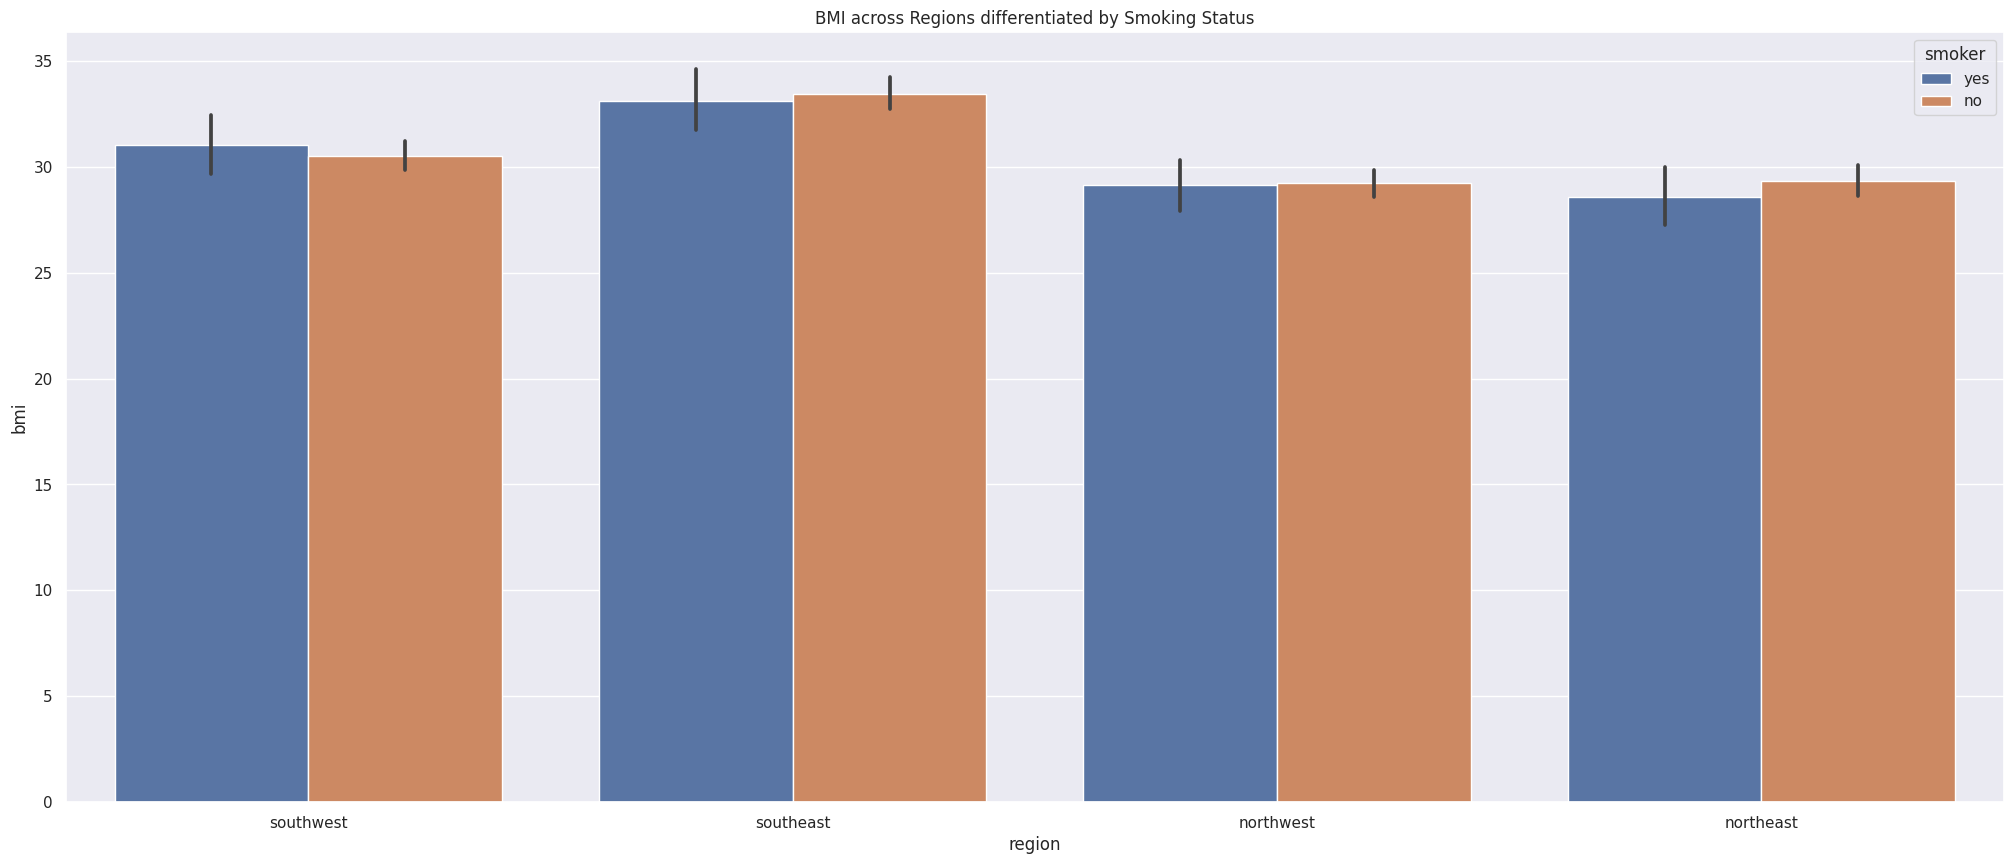

In [ ]:
sns.barplot(x='region', y='bmi', hue='smoker', data=insurance)
plt.title('BMI across Regions differentiated by Smoking Status')
plt.show()

In [ ]:
region_children = insurance.groupby('region')['children'].sum()
region_with_most_children = region_children.idxmax()
print(f"Region with most children: {region_with_most_children}")

Region with most children: southeast


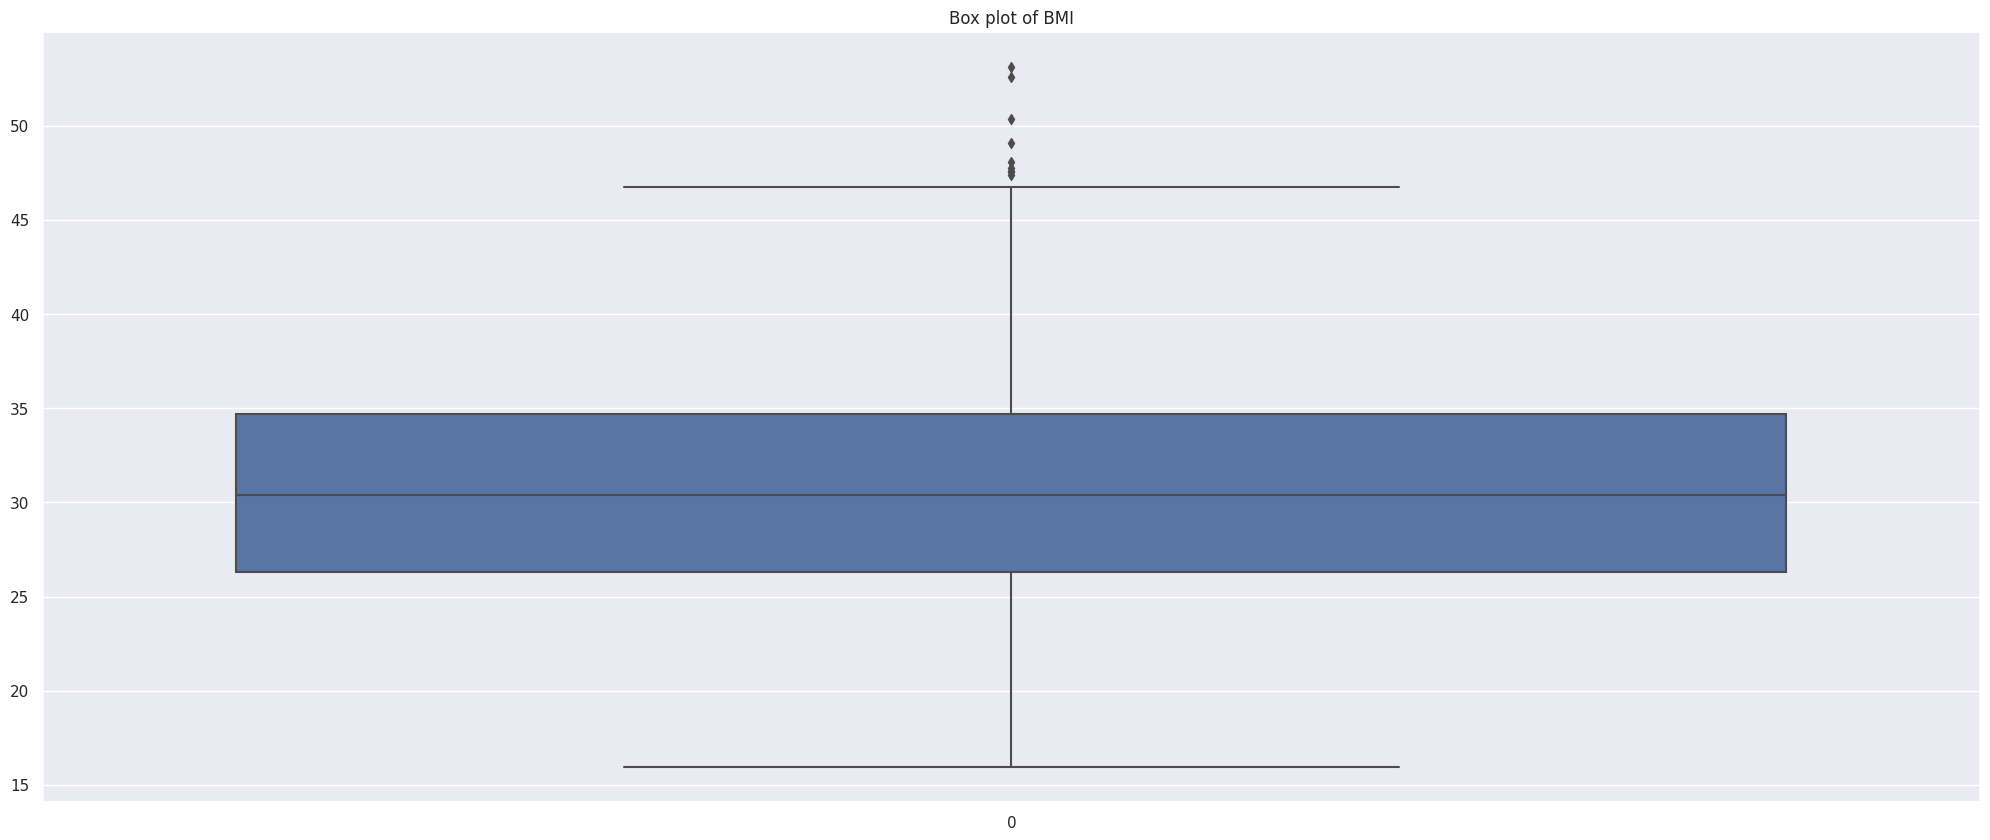

In [ ]:
sns.boxplot(insurance['bmi'])
plt.title('Box plot of BMI')
plt.show()